In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from lmfit import minimize, Parameters, Parameter, report_fit
from numpy import asarray
from numpy import savetxt
from numpy import random
from statsmodels.tsa.stattools import adfuller


from statsmodels.tsa.arima.model import ARIMA

import os

import time

import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning) 

start = time.time() #Saves the begining time of the process

os.makedirs('GraficasProyDNN',exist_ok=True)


In [199]:
def adfuller_test(serie):
    result=adfuller(serie)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")
    return result

In [200]:
#Movimiento aleatorio, no browniano
N = 100
direccion = []
for i in range(N):
    a = random.randint(10) #si los numeros van de 0 a 9, por lo que la media es 4.5
    if a < 5:#si van de -9 a 9 la media es 0
        direccion.append(-1)
    else:
        direccion.append(1)

direccion = np.array(direccion)

#listado de numeros aleatorios
def f(x,direccion):
    aleatorio = random.randint(10, size=(len(x)))
    y = direccion*aleatorio
    return y


x= []
for i in range(N):
    x.append(i)

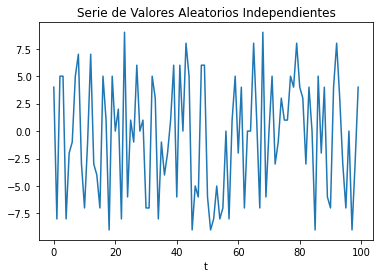

In [209]:
y = f(x,direccion)
plt.plot(x,y)
plt.title("Serie de Valores Aleatorios Independientes")
plt.xlabel("t")
plt.savefig('EjemploAutocorrelaciones/'+'Serie_Trivial.pdf', bbox_inches = 'tight')


In [207]:
np.array(y).mean(),  np.array(y).std()

(-0.45, 5.550450432172148)

/home/carlos/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


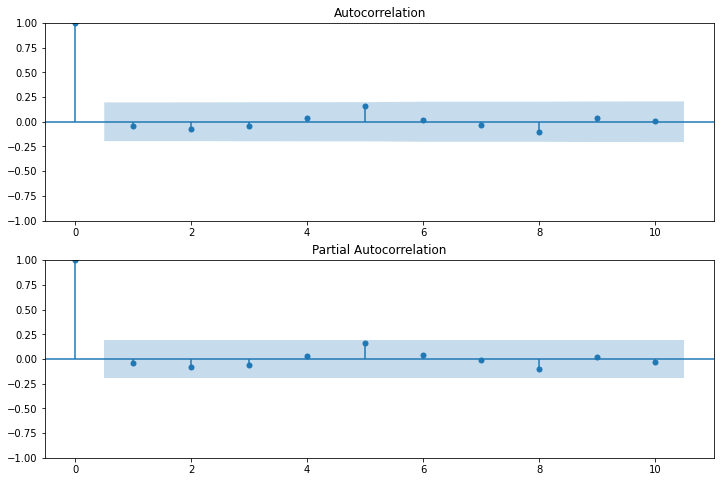

In [210]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(y, lags = 10,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y, lags = 10,ax=ax2)
plt.savefig('EjemploAutocorrelaciones/'+'Autocorrelaciones_Serie_Trivial.pdf', bbox_inches = 'tight')


In [72]:
#si quiere de grado 2, aplique dos veces Diferencias con grado=1
#para quitar tendencia y periodicidad
def Diferencias(serie): #grado 1 implicito
    #suponga grado = 1
    #serie = [1,2,3,4,5]
    s1 = np.array(serie[:len(serie)-1]) #[1,2,3,4]
    s2 = np.array(serie[1:])#[2,3,4,5]
    serie_nueva = (s2-s1).tolist()
    return serie_nueva

In [183]:
adfuller_test(y)
#qué significa que la serie sea estacionaria.

ADF Test Statistic : -10.093357571464226
p-value : 1.1071644407247217e-17
#Lags Used : 0
Number of Observations : 99
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


(-10.093357571464226,
 1.1071644407247217e-17,
 0,
 99,
 {'1%': -3.498198082189098,
  '5%': -2.891208211860468,
  '10%': -2.5825959973472097},
 544.4822412576805)

In [ ]:
###########################

In [220]:
#browniano

N = 10000
direccion = []
for i in range(N):
    a = random.randint(10)
    if a < 5:
        direccion.append(-1)
    else:
        direccion.append(1)
direccion = np.array(direccion)

def browniano(direccion, y0):
    y = [y0]
    for i in direccion:
        y0 = y0+i #tamanio de paso constante
        y.append(y0)
    return y


x= []
for i in range(N):
    x.append(i)

Text(0, 0.5, 'x')

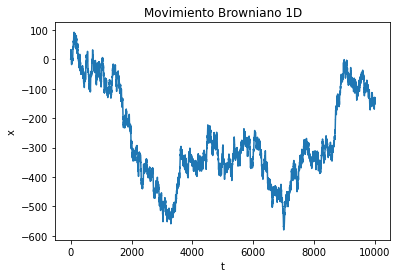

In [230]:
N = 10000
direccion = []
for i in range(N):
    a = random.randint(10)
    if a < 5:
        direccion.append(-1*random.randint(10))
    else:
        direccion.append(1*random.randint(10))
direccion = np.array(direccion)

y = browniano(direccion, 0)
plt.plot(y)
plt.title("Movimiento Browniano 1D")
plt.xlabel("t")
plt.ylabel("x")

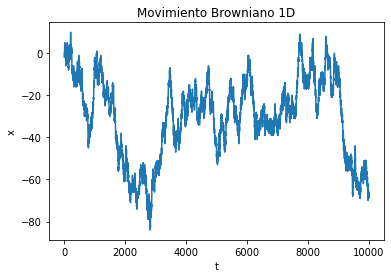

In [224]:
y = browniano(direccion, 0)
plt.plot(y)
plt.title("Movimiento Browniano 1D")
plt.xlabel("t")
plt.ylabel("x")
plt.savefig('EjemploAutocorrelaciones/'+'Browniano.pdf', bbox_inches = 'tight')


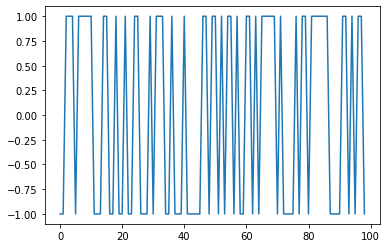

In [222]:
serie_nueva = Diferencias(y[0:100])
plt.plot(serie_nueva)
#se nota la uniformidad del tamaño de paso

In [188]:
adfuller_test(y)

ADF Test Statistic : -1.1642053542105018
p-value : 0.6888011062457317
#Lags Used : 1
Number of Observations : 29999
weak evidence against null hypothesis,indicating it is non-stationary 


(-1.1642053542105018,
 0.6888011062457317,
 1,
 29999,
 {'1%': -3.4305680025880942,
  '5%': -2.8616363512511263,
  '10%': -2.5668212848307097},
 84993.59108431006)

/home/carlos/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


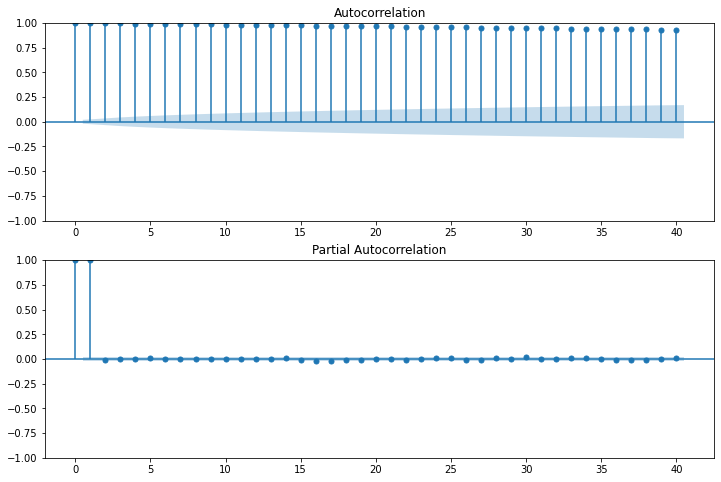

In [225]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(y, lags = 40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y, lags = 40,ax=ax2)
plt.savefig('EjemploAutocorrelaciones/'+'AutocorrelacionesBrowniano.pdf', bbox_inches = 'tight')


In [191]:
adfuller_test(serie_nueva)

ADF Test Statistic : -7.767752158119634
p-value : 9.09181081223941e-12
#Lags Used : 0
Number of Observations : 98
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


(-7.767752158119634,
 9.09181081223941e-12,
 0,
 98,
 {'1%': -3.4989097606014496,
  '5%': -2.891516256916761,
  '10%': -2.5827604414827157},
 241.5894153994492)

/home/carlos/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


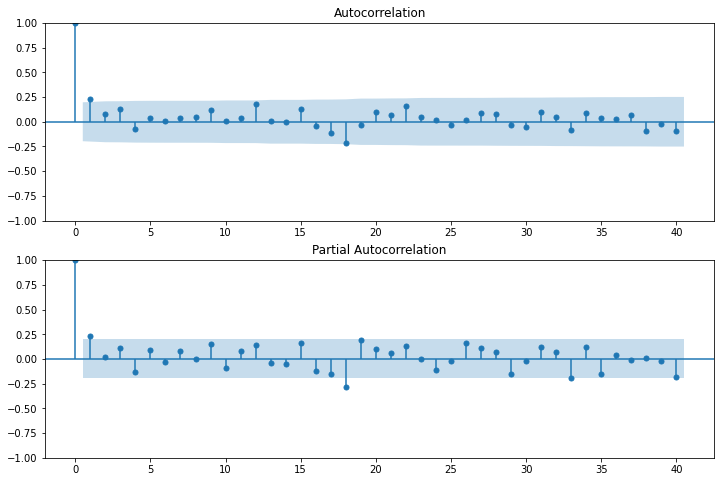

In [192]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(serie_nueva, lags = 40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(serie_nueva, lags = 40,ax=ax2)

In [115]:
#Es un proceso estacionario!
inicio = 1000
fin = 1100
t= []
for i in range(inicio, fin+1):
    t.append(i)

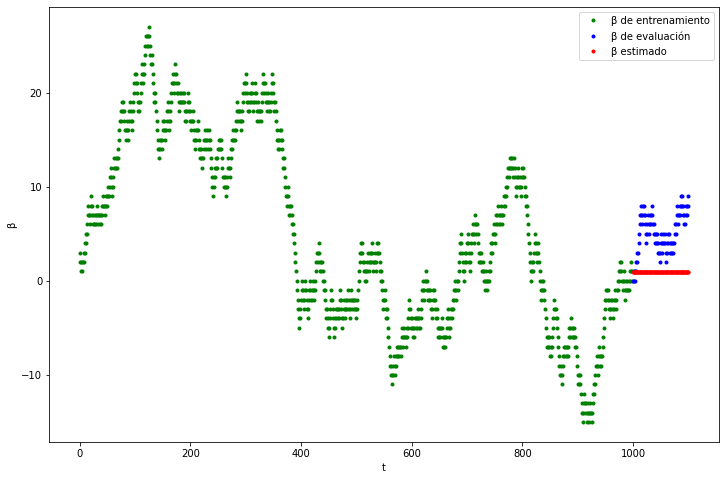

In [120]:

p=1
d=1
q = 1
model=ARIMA(y,order=(p,d,q)) #d=0 porque ya es estacionario, no necesito diferencias
model_fit=model.fit()

forecast = model_fit.predict(start=inicio,end=fin,dynamic=True)
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(y[:inicio],'g.', label='\u03B2 de entrenamiento')
plt.plot(t, y[inicio:inicio+101], 'b.', label='\u03B2 de evaluación')
plt.plot(t, forecast, 'r.', label='\u03B2 estimado')
plt.xlabel('t')
plt.ylabel('\u03B2')
#plt.title('ARIMA('+str(p)+','+str(d)+','+str(q)+')'+ NOMBREDEPTO[0])
plt.legend(loc='best')
#plt.savefig('Predicciones/'+'Predicciones_Beta_GT_ola3_a.pdf', bbox_inches = 'tight')
